In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
tf.get_logger().setLevel('ERROR')


def func_a(x):
    """f(x) = sin(2x) + cos(3x), onde 0 <= x <= 5"""
    return np.sin(2 * x) + np.cos(3 * x)

def func_b(x):
    """f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2, onde 0 <= x <= 5"""
    return 10*(x**5) + 5*(x**4) + 2*(x**3) - 0.5*(x**2) + 3*x + 2

def gerar_dados(func, num_pontos, x_range=(0, 5)):
    """Gera dados de entrada e saída para a função."""
    x = np.linspace(x_range[0], x_range[1], num_pontos)
    y = func(x)
    return x.reshape(-1, 1), y.reshape(-1, 1)

In [3]:
def criar_mlp(num_camadas_ocultas, num_neuronios, input_shape):
    """Cria e compila um modelo MLP com a arquitetura especificada."""
    model = keras.Sequential()

    for _ in range(num_camadas_ocultas):
        model.add(layers.Dense(num_neuronios, activation='relu', input_shape=input_shape))

    model.add(layers.Dense(1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model


In [4]:
def treinar_e_plotar(func, nome_func, num_neuronios_por_camada=64, num_camadas_ocultas=2):
    print(f"--- Processando a função: {nome_func} ---")

    x_treino, y_treino = gerar_dados(func, 1000)
    x_validacao, y_validacao = gerar_dados(func, 200)

    modelo = criar_mlp(num_camadas_ocultas=num_camadas_ocultas,
                       num_neuronios=num_neuronios_por_camada,
                       input_shape=(1,))

    historico = modelo.fit(x_treino, y_treino,
                           validation_data=(x_validacao, y_validacao),
                           epochs=256,
                           verbose=0)

    mse_treino = modelo.evaluate(x_treino, y_treino, verbose=0)
    mse_validacao = modelo.evaluate(x_validacao, y_validacao, verbose=0)

    print(f"MSE final - Treinamento: {mse_treino:.6f}")
    print(f"MSE final - Validação:   {mse_validacao:.6f}")

    x_plot, y_real = gerar_dados(func, 600)
    y_aprox = modelo.predict(x_plot)

    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_real, 'b-', label='Função Real')
    plt.plot(x_plot, y_aprox, 'r--', label='Função Aproximada (MLP)')
    plt.title(f'Aproximação da Função: {nome_func}')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

    historia_df = pd.DataFrame(historico.history)
    plt.figure(figsize=(10, 6))
    plt.plot(historia_df['loss'], 'b-', label='Erro de Treinamento')
    plt.plot(historia_df['val_loss'], 'r-', label='Erro de Validação')
    plt.title(f'Curva de Erro (MSE) para {nome_func}')
    plt.xlabel('Época')
    plt.ylabel('Erro Quadrático Médio (MSE)')
    plt.legend()
    plt.grid(True)
    plt.show()

--- Processando a função: f(x) = sin(2x) + cos(3x) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


MSE final - Treinamento: 0.001048
MSE final - Validação:   0.001049
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


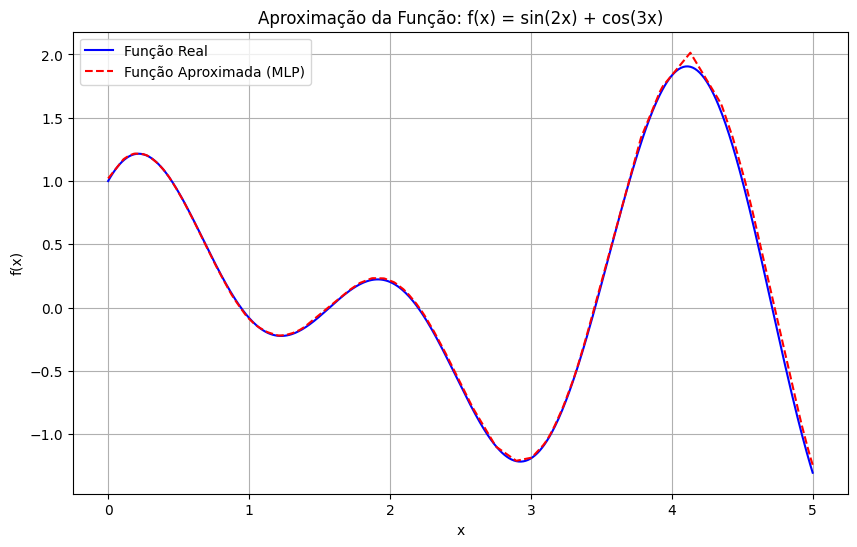

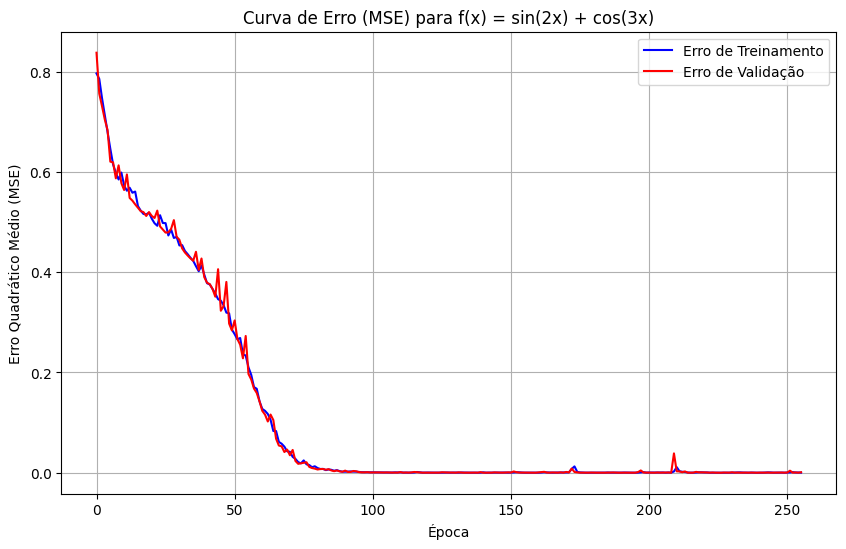

--- Processando a função: f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2 ---
MSE final - Treinamento: 460.954773
MSE final - Validação:   535.596069
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


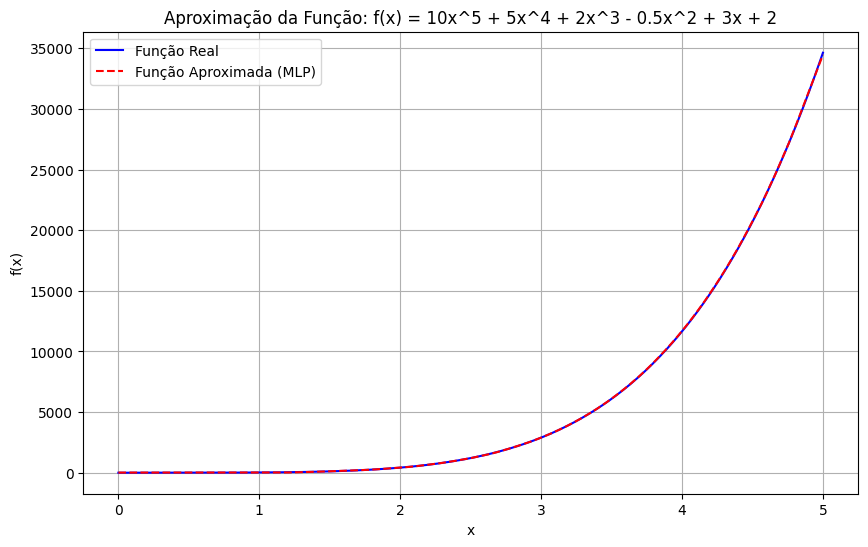

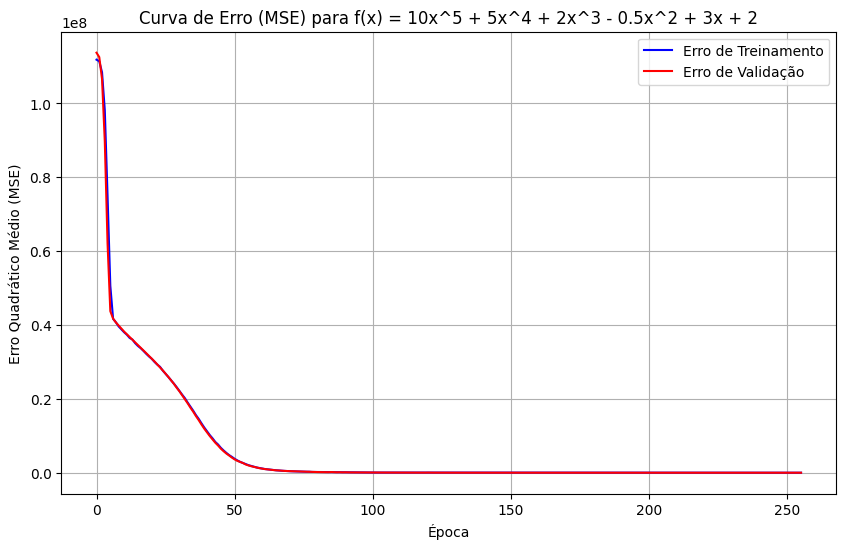

In [5]:
treinar_e_plotar(func_a, "f(x) = sin(2x) + cos(3x)", num_neuronios_por_camada=128)


treinar_e_plotar(func_b, "f(x) = 10x^5 + 5x^4 + 2x^3 - 0.5x^2 + 3x + 2",
                 num_neuronios_por_camada=128, num_camadas_ocultas=3)